In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# Load dataset
data = pd.read_csv("data/spam_sms.csv", delimiter=",")




# Convert text labels in 'v1' to numerical values
data['v1'] = data['v1'].map({'ham': 0, 'spam': 1})

# Rename columns: 'label' to 'v1' and 'message' to 'v2'

data.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

In [19]:
data.columns

Index(['v1', 'v2'], dtype='object')

In [3]:
data.head(5)

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Light Gradient Boosting

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset


# Preprocessing
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['message'])  # Use 'v2' for messages
y = data['label']  # Use 'v1' for labels now containing 0 and 1

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model =LGBMClassifier() 
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))



[LightGBM] [Info] Number of positive: 597, number of negative: 3860
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002521 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5666
[LightGBM] [Info] Number of data points in the train set: 4457, number of used features: 324
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.133947 -> initscore=-1.866505
[LightGBM] [Info] Start training from score -1.866505
Accuracy: 0.9785
Confusion Matrix:
 [[958   7]
 [ 17 133]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.95      0.89      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



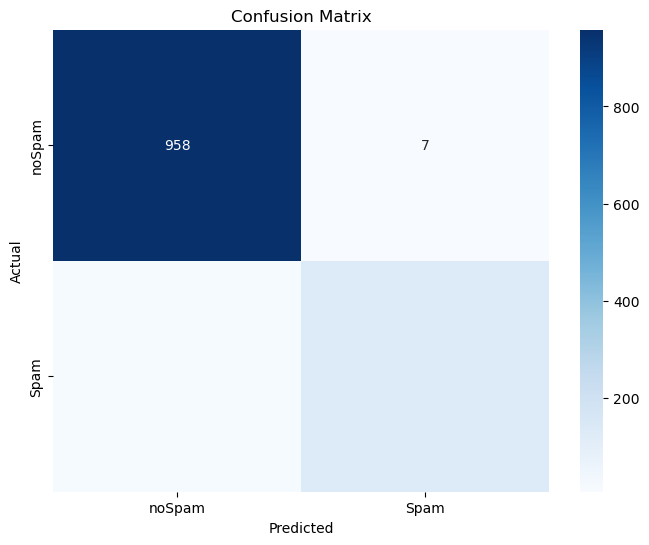

In [13]:
# Visualization of Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['noSpam', 'Spam'], yticklabels=['noSpam', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
